In [ ]:
%pip install opencv-python==4.6.0.66 matplotlib==3.6.2 imageio==2.23.0 scikit-image torch torchvision torchaudio


  Using cached opencv_python-4.6.0.66-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached matplotlib-3.6.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.8 kB)
  Using cached imageio-2.23.0-py3-none-any.whl.metadata (5.0 kB)
INFO: pip is looking at multiple versions of scikit-image to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 111.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 88.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.10.0.84
    Uninstalling opencv-python-4.10.0.84:
      Successfully uninstalled openc

In [ ]:
%pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.16
albumentations                     1.4.15
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.19.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.21.0.33.21
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread      

In [ ]:
import os
import cv2
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio
from skimage import io, filters, color, feature  # Import necessary functions from scikit-image


In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
import gdown

In [ ]:
url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
output = "data.zip"
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

Downloading...
From (original): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL
From (redirected): https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL&confirm=t&uuid=edf05690-c550-4e2a-8a51-189879370eca
To: /content/data.zip
100%|██████████| 423M/423M [00:10<00:00, 39.4MB/s]


['data/',
 'data/alignments/',
 'data/alignments/s1/',
 'data/alignments/s1/bbaf2n.align',
 'data/alignments/s1/bbaf3s.align',
 'data/alignments/s1/bbaf4p.align',
 'data/alignments/s1/bbaf5a.align',
 'data/alignments/s1/bbal6n.align',
 'data/alignments/s1/bbal7s.align',
 'data/alignments/s1/bbal8p.align',
 'data/alignments/s1/bbal9a.align',
 'data/alignments/s1/bbas1s.align',
 'data/alignments/s1/bbas2p.align',
 'data/alignments/s1/bbas3a.align',
 'data/alignments/s1/bbaszn.align',
 'data/alignments/s1/bbaz4n.align',
 'data/alignments/s1/bbaz5s.align',
 'data/alignments/s1/bbaz6p.align',
 'data/alignments/s1/bbaz7a.align',
 'data/alignments/s1/bbbf6n.align',
 'data/alignments/s1/bbbf7s.align',
 'data/alignments/s1/bbbf8p.align',
 'data/alignments/s1/bbbf9a.align',
 'data/alignments/s1/bbbm1s.align',
 'data/alignments/s1/bbbm2p.align',
 'data/alignments/s1/bbbm3a.align',
 'data/alignments/s1/bbbmzn.align',
 'data/alignments/s1/bbbs4n.align',
 'data/alignments/s1/bbbs5s.align',
 'data/al

In [ ]:
def load_video(path: str) -> List[np.ndarray]:
    cap = cv2.VideoCapture(path)
    frames = []

    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        if not ret:  # checking if the frame was read correctly
            break

        # converting the frame to grayscale using scikit-image
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # using OpenCV for conversion

        # cropping the frame
        cropped_frame = gray_frame[190:236, 80:220]
        frames.append(cropped_frame)

    cap.release()

    # converting frames to a NumPy array for mean and std calculations
    frames_np = np.array(frames)

    mean = np.mean(frames_np)
    std = np.std(frames_np)

    # normalizing the frames
    return (frames_np - mean) / std  # Normalization


In [ ]:
# defining the vocabulary for the model
vocab = list("abcdefghijklmnopqrstuvwxyz'?!123456789 ")


In [ ]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [ ]:
# creaing ea character to number mapping
char_to_num = {char: idx for idx, char in enumerate(vocab)}
num_to_char = {idx: char for char, idx in char_to_num.items()}

print(f"The vocabulary is: {vocab} (size = {len(vocab)})")


The vocabulary is: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size = 39)


In [ ]:
def load_alignments(path: str) -> List[int]:
    with open(path, 'r') as f:
        lines = f.readlines()

    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens.append(line[2])  # collecting valid tokens

    # converting tokens to corresponding numbers using char_to_num
    num_tokens = [char_to_num.get(token, -1) for token in tokens]
    return num_tokens[1:]  # Excluding the first element if needed


In [ ]:
def load_data(path: str):

    file_name = os.path.basename(path).split('.')[0]

    video_path = os.path.join('data', 's1', f'{file_name}.mpg')
    alignment_path = os.path.join('data', 'alignments', 's1', f'{file_name}.align')


    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments


In [ ]:
test_path = './data/s1/bbal6n.mpg'

In [ ]:
file_name = os.path.basename(test_path).split('.')[0]
print(file_name)

bbal6n


In [ ]:
frames, alignments = load_data(test_path)


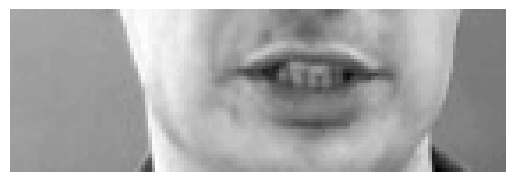

In [ ]:
plt.imshow(frames[35], cmap='gray')  # Using cmap='gray' for grayscale images
plt.axis('off')
plt.show()


In [ ]:
print(alignments)


[-1, -1, 11, -1, -1]


In [ ]:
decoded_string = ''.join(num_to_char.get(num, '') for num in alignments)
print(decoded_string)


l


In [ ]:
def mappable_function(path: str) -> tuple:
    frames, alignments = load_data(path)
    return frames, alignments


Creating the data pipeline

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
import glob
import random

# listing all .mpg files in the specified directory
file_paths = glob.glob('./data/s1/*.mpg')

# shuffling the file paths
random.shuffle(file_paths)

# loading data for all files and store them in a list
data = [mappable_function(path) for path in file_paths]

# defining batch size
batch_size = 2

# creating batches manually
batches = [data[i:i + batch_size] for i in range(0, len(data), batch_size)]

# splitting into train and test sets
train_size = 450
train_batches = batches[:train_size // batch_size]
test_batches = batches[train_size // batch_size:]


In [ ]:

test_length = len(test_batches)
print(test_length)


275


In [ ]:
frames, alignments = train_batches[0]

frames = [f for f, _ in train_batches[0]]
alignments = [a for _, a in train_batches[0]]


TypeError: Invalid shape (75, 46, 140) for image data

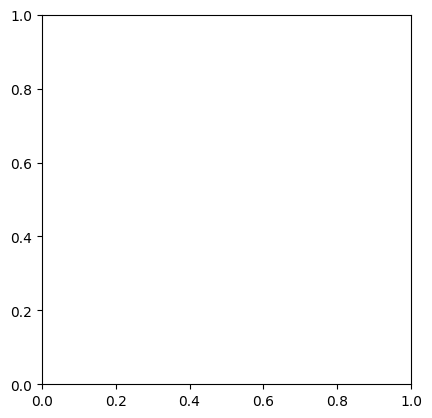

In [ ]:
plt.imshow(frames[0], cmap='gray')
plt.axis('off')
plt.show()


In [ ]:
print("Alignments (as integers):", alignments)


Alignments (as integers): [[-1, -1, 8, -1, -1], [-1, -1, 23, -1, -1]]


In [ ]:
num_frames = len(frames)
print("Number of frames:", num_frames)

Number of frames: 2


In [ ]:
# creating an iterator for the training batches
sample_iterator = iter(train_batches)


In [ ]:
# getting the next sample from the iterator
val = next(sample_iterator)
frames_sample, alignments_sample = val

frames_from_sample = frames_sample


In [ ]:
print("Shape of the first frame:", val[0][0].shape)


Shape of the first frame: (75, 46, 140)


In [ ]:
import numpy as np
import imageio


frames = val[0][0]

frames_processed = [(frame.reshape(46, 140) * 255).astype(np.uint8) for frame in frames]

# Save as GIF
imageio.mimsave('./animation.gif', frames_processed, fps=10)


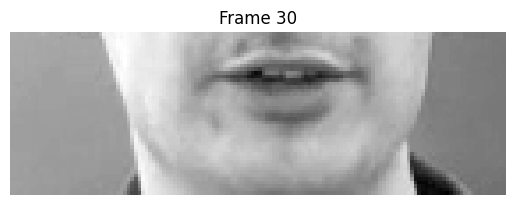

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(val[0][0][30], cmap='gray')
plt.axis('off')
plt.title("Frame 30")
plt.show()


In [ ]:
import numpy as np

decoded_alignments = ''.join(num_to_char.get(int(num.item()) if isinstance(num, np.ndarray) and num.size == 1 else int(num), '')
                          for num in val[1][0])

print("Decoded Alignments:", decoded_alignments)

TypeError: only length-1 arrays can be converted to Python scalars

Designing the deep neural network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn import functional as F


In [ ]:
for frames, alignments in DataLoader:
    print(frames.shape)
    break  # exit after the first batch


TypeError: 'type' object is not iterable

In [ ]:
import torch
import torch.nn as nn

class My3DModel(nn.Module):
    def __init__(self):
        super(My3DModel, self).__init__()

        # 3D Convolutional Layers
        self.conv1 = nn.Conv3d(in_channels=1, out_channels=128, kernel_size=3, padding='same')
        self.pool1 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        self.conv2 = nn.Conv3d(in_channels=128, out_channels=256, kernel_size=3, padding='same')
        self.pool2 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        self.conv3 = nn.Conv3d(in_channels=256, out_channels=75, kernel_size=3, padding='same')
        self.pool3 = nn.MaxPool3d(kernel_size=(1, 2, 2))

        # Fully connected layer after flattening the output
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(75 * 75 * 35, 128)

        # Bidirectional LSTM Layers
        self.lstm1 = nn.LSTM(input_size=128, hidden_size=128, bidirectional=True, batch_first=True)
        self.dropout1 = nn.Dropout(0.5)

        self.lstm2 = nn.LSTM(input_size=256, hidden_size=128, bidirectional=True, batch_first=True)
        self.dropout2 = nn.Dropout(0.5)

        # Output Layer
        self.fc2 = nn.Linear(256, char_to_num.vocabulary_size() + 1)

    def forward(self, x):
        # Convolutional Layers
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))

        # Flattening and passing through the fully connected layer
        x = self.flatten(x)
        x = self.fc1(x)

        # Reshape for LSTM layers
        x = x.view(x.size(0), -1, 128)
        x, _ = self.lstm1(x)
        x = self.dropout1(x)

        x, _ = self.lstm2(x)
        x = self.dropout2(x)

        # Output Layer
        x = self.fc2(x)

        return x

# Instantiate the model
model = My3DModel()
print(model)


Shape after TimeDistributed Flatten:  (None, 75, 6375)
Shape after first Bidirectional LSTM:  (None, 75, 256)
Shape after Dense (final) layer:  (None, 75, 41)


In [ ]:
pip install torchsummary


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 activation (Activation)     (None, 75, 46, 140, 128)  0         
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 activation_1 (Activation)   (None, 75, 23, 70, 256)   0         
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                    

In [ ]:
from torchsummary import summary

device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

# model summary
summary(model, input_size=(1, 75, 46, 140))  # (channels, depth, height, width)


In [ ]:
import torch
model.eval()

input_data = val[0]
input_data = input_data.unsqueeze(1)
input_data = input_data.to(device)


with torch.no_grad():
    yhat = model(input_data)


print(yhat.shape)


1/1 [==============================] - 8s 8s/step


In [ ]:

predicted_indices = torch.argmax(yhat[0], axis=1)

# Convert indices to characters using your mapping
predicted_chars = [num_to_char[index.item()] for index in predicted_indices]

# Joining the characters to form a string
predicted_string = ''.join(predicted_chars)
print(predicted_string)


<tf.Tensor: shape=(), dtype=string, numpy=b'aaeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeetttttttttteeetttttteeeeeeeeeeeeeeeeeeeeeee'>

In [ ]:
predicted_indices = torch.argmax(yhat[0], dim=1)  # Shape: (sequence_length, num_classes)

# Converting the indices to characters
predicted_chars = [num_to_char[index.item()] for index in predicted_indices]

predicted_string = ''.join(predicted_chars)

print(predicted_string)


<tf.Tensor: shape=(), dtype=string, numpy=b'aaeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeetttttttttteeetttttteeeeeeeeeeeeeeeeeeeeeee'>

In [ ]:
first_layer = model.children().__iter__().__next__()

if isinstance(first_layer, torch.nn.Conv3d):
    input_shape = (None, first_layer.in_channels, first_layer.kernel_size[0],
                   first_layer.kernel_size[1], first_layer.kernel_size[2])
    print("Input shape expected by the model:", input_shape)


(None, 75, 46, 140, 1)

In [ ]:
import torch

dummy_input = torch.randn(1, 1, 75, 46, 140)

with torch.no_grad():
    output = model(dummy_input)

print("Output shape:", output.shape)


(None, 75, 41)

Setting up training

In [ ]:
import torch

def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * torch.exp(torch.tensor(-0.1))

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    new_lr = scheduler(epoch, optimizer.param_groups[0]['lr'])
    for param_group in optimizer.param_groups:
        param_group['lr'] = new_lr

    print(f"Epoch {epoch+1}/{num_epochs}, Learning Rate: {new_lr.item()}")


In [ ]:
import torch
import torch.nn as nn

def CTCLoss(y_true, y_pred):
    y_true = y_true.long()

    y_pred = nn.functional.log_softmax(y_pred, dim=2)

    input_length = torch.full(size=(y_pred.size(1),), fill_value=y_pred.size(0), dtype=torch.int)
    label_length = torch.full(size=(y_true.size(0),), fill_value=y_true.size(1), dtype=torch.int)

    ctc_loss = nn.CTCLoss(blank=0)
    loss = ctc_loss(y_pred, y_true, input_length, label_length)

    return loss


In [ ]:
import torch
import numpy as np

class ProduceExample:
    def __init__(self, dataset):
        self.dataset = dataset

    def on_epoch_end(self, model, epoch):
        # Get a batch of data from the dataset
        data = next(self.dataset)

        # Move data to the appropriate device (CPU or GPU)
        frames, alignments = data
        frames = frames.to('cuda') if torch.cuda.is_available() else frames  # Use GPU if available

        # Make predictions
        with torch.no_grad():
            yhat = model(frames)  # Assuming your model takes frames as input

        # Decode predictions (Assuming the predictions are logits)
        input_lengths = torch.full(size=(yhat.size(1),), fill_value=yhat.size(0), dtype=torch.int)

        # Apply log softmax
        yhat = torch.log_softmax(yhat, dim=2)

        # Decode using CTC
        decoded_indices = torch.argmax(yhat, dim=2)  # Get indices of the max log-probabilities

        # Convert the decoded indices to characters
        for x in range(decoded_indices.size(0)):
            original = ''.join([num_to_char[i.item()] for i in alignments[x]])
            prediction = ''.join([num_to_char[i.item()] for i in decoded_indices[x]])

            print('Original:', original)
            print('Prediction:', prediction)
            print('~' * 100)

# Example usage in training loop:
# Assuming `train_loader` is your DataLoader and `model` is your PyTorch model
produce_example_callback = ProduceExample(train_loader)

# Inside your training loop
for epoch in range(num_epochs):
    # Training logic here...

    # At the end of each epoch
    produce_example_callback.on_epoch_end(model, epoch)


In [ ]:
import os
import torch
import numpy as np
from torch.utils.data import DataLoader
from torch.optim import Adam
import torch.nn.functional as F

model.to('cuda') if torch.cuda.is_available() else model  # Move model to GPU if available

# Define optimizer
optimizer = Adam(model.parameters(), lr=0.0001)

# Define CTC loss
ctc_loss = nn.CTCLoss(blank=char_to_num.vocabulary_size())

# Prepare DataLoaders
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2)
# Learning Rate Scheduler
def scheduler(epoch):
    if epoch < 30:
        return 0.0001
    else:
        return 0.0001 * torch.exp(-0.1)

# Checkpoint saving function
def save_checkpoint(epoch, model, optimizer, filename):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
    }, filename)

# Example callback for printing predictions
def produce_example(model, data_loader):
    model.eval()
    with torch.no_grad():
        for frames, alignments in data_loader:
            frames = frames.to('cuda') if torch.cuda.is_available() else frames
            outputs = model(frames)
            predicted = torch.argmax(outputs, dim=2)
            # Decode the predictions and print them
            for i in range(predicted.size(1)):  # Looping through each sample in the batch
                print('Original:', ' '.join(num_to_char(alignments[i].cpu().numpy())))
                print('Prediction:', ' '.join(num_to_char(predicted[i].cpu().numpy())))
                print('~' * 100)
            break  # Only runs for one batch

# Training Loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    for frames, alignments in train_loader:
        frames = frames.to('cuda') if torch.cuda.is_available() else frames
        alignments = alignments.to('cuda') if torch.cuda.is_available() else alignments

        optimizer.zero_grad()  # Clear gradients

        # Forward pass
        outputs = model(frames)  # Get model predictions

        # Compute input lengths (assuming a fixed length for simplicity)
        input_lengths = torch.full(size=(outputs.size(1),), fill_value=outputs.size(0), dtype=torch.int)

        # Compute CTC loss
        loss = ctc_loss(outputs.log_softmax(2), alignments, input_lengths, alignments.size(1))

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')

    # Save checkpoint
    save_checkpoint(epoch, model, optimizer, os.path.join('models', 'checkpoint.pth'))

    # Adjust learning rate
    for param_group in optimizer.param_groups:
        param_group['lr'] = scheduler(epoch)

    # Produce examples from test set
    produce_example(model, test_loader)
